# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX + ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2021-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

In [4]:
spot2 = spot_ndf.copy()

spot2["USDIDR"] = spot_ndf["USDIDR"] - ndf["USDIDR"]/fwd_scale["USDIDR"]
spot2["USDINR"] = spot_ndf["USDINR"] - ndf["USDINR"]/fwd_scale["USDINR"]
spot2["USDMYR"] = spot_ndf["USDMYR"] - ndf["USDMYR"]/fwd_scale["USDMYR"]
spot2["USDTWD"] = spot_ndf["USDTWD"] - ndf["USDTWD"]/fwd_scale["USDTWD"]
spot2["USDKRW"] = spot_ndf["USDKRW"] - ndf["USDKRW"]/fwd_scale["USDKRW"]
spot2["USDPHP"] = spot_ndf["USDPHP"] - ndf["USDPHP"]/fwd_scale["USDPHP"]

spot_price_ori2 = spot2.pipe(fill_date, True).pipe(omit_trailing_na).pipe(omit_leading_na, how = "any")
spot_price_usd2 = spot_price_ori2.pipe(standardize_series, "prices")[ALL_FX]

# Data integrity

# Signal

In [5]:
sig = spot_price_usd2[universe].pipe(fill_date).rolling(window = 252*6, min_periods = 252*3).apply(lambda x: (x[-1]/x[0])-1).pipe(demean_xs).pipe(top_bottom_xs).pipe(cap_helper, 0.2).pipe(rolling_mean, 5) * -1

# Backtest Daily Rebal

In [6]:
daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":False})
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [7]:
get_summary(daily_bt)

Returns   : 0.0664701250049794
Vol       : 0.10236992847370965
SR        : 0.6493129964631172
Max DD    : -28.23

C Returns : 0.06313005394306018
C SR      : 0.536818523626096
C Max DD  : -25.62

Hit rate  : 0.522
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.09


In [8]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR,USDCNH
annualized_return,0.412302,0.578856,-0.412087,0.843984,0.435199,0.004491,-0.043619,-0.271208,1.016844,-0.225571,-0.48561,0.52085,1.31049,1.924659,0.966163,1.316832,0.645286,-1.434046
sharpe,0.134781,0.337119,-0.21628,0.2314,0.120568,0.001558,-0.022692,-0.09264,0.308147,-0.095685,-0.180198,0.177272,0.323166,0.70353,0.274572,0.352453,0.467761,-0.502668
dollar_sharpe,0.117347,0.328369,-0.225029,0.226939,0.101111,-0.01366,-0.031963,-0.101129,0.303086,-0.111183,-0.199539,0.162472,0.303101,0.662619,0.267457,0.338868,0.462456,-0.556296
trade_sharpe,0.165488,0.786794,-0.362334,0.307302,0.131787,-0.002881,-0.065883,-0.135484,0.356052,-0.105242,-0.277773,0.208561,0.387747,1.135892,0.349652,0.404029,0.784644,-0.838737
long_sharpe,0.500556,0.654039,-0.165522,5.711306,0.881882,0.026553,0.29012,1.034356,0.356052,-0.106064,-0.576701,0.359588,0.384424,0.419974,-6.218325,NaN,7.187952,-0.838737
short_sharpe,-0.513924,1.306281,-0.826516,0.178445,-0.454195,-0.312731,-0.118805,-0.3603,NaN,3.187575,0.677866,-0.022939,0.390516,1.392805,0.362197,0.404029,0.664555,NaN
sortino,0.080022,0.104859,-0.089878,0.121448,0.077559,0.000875,-0.007007,-0.042516,0.172786,-0.046714,-0.084237,0.095867,0.183287,0.313868,0.144155,0.209412,0.177906,-0.165629
max_drawdown,-14.812178,-4.489324,-13.477104,-12.977134,-18.612181,-14.325456,-10.748112,-20.78958,-13.409199,-10.389739,-29.263659,-8.831169,-8.310058,-5.891678,-19.044883,-9.633511,-3.634635,-15.477984
max_drawdown_start,2018-01-26,2010-05-26,2003-09-02,2009-11-16,2014-04-03,2003-09-02,2018-12-31,2018-02-01,2011-03-08,2010-06-07,2005-02-28,2006-05-10,2016-12-28,2010-05-06,2011-08-01,2018-01-25,2016-07-14,2016-12-16
max_drawdown_end,2020-03-19,2016-01-19,2015-03-13,2010-05-18,2015-06-05,2007-07-24,2020-03-19,2020-03-20,2011-08-09,2011-08-01,2019-12-31,2007-09-07,2018-01-12,2010-11-04,2013-09-03,2018-10-04,2017-01-03,2018-02-15


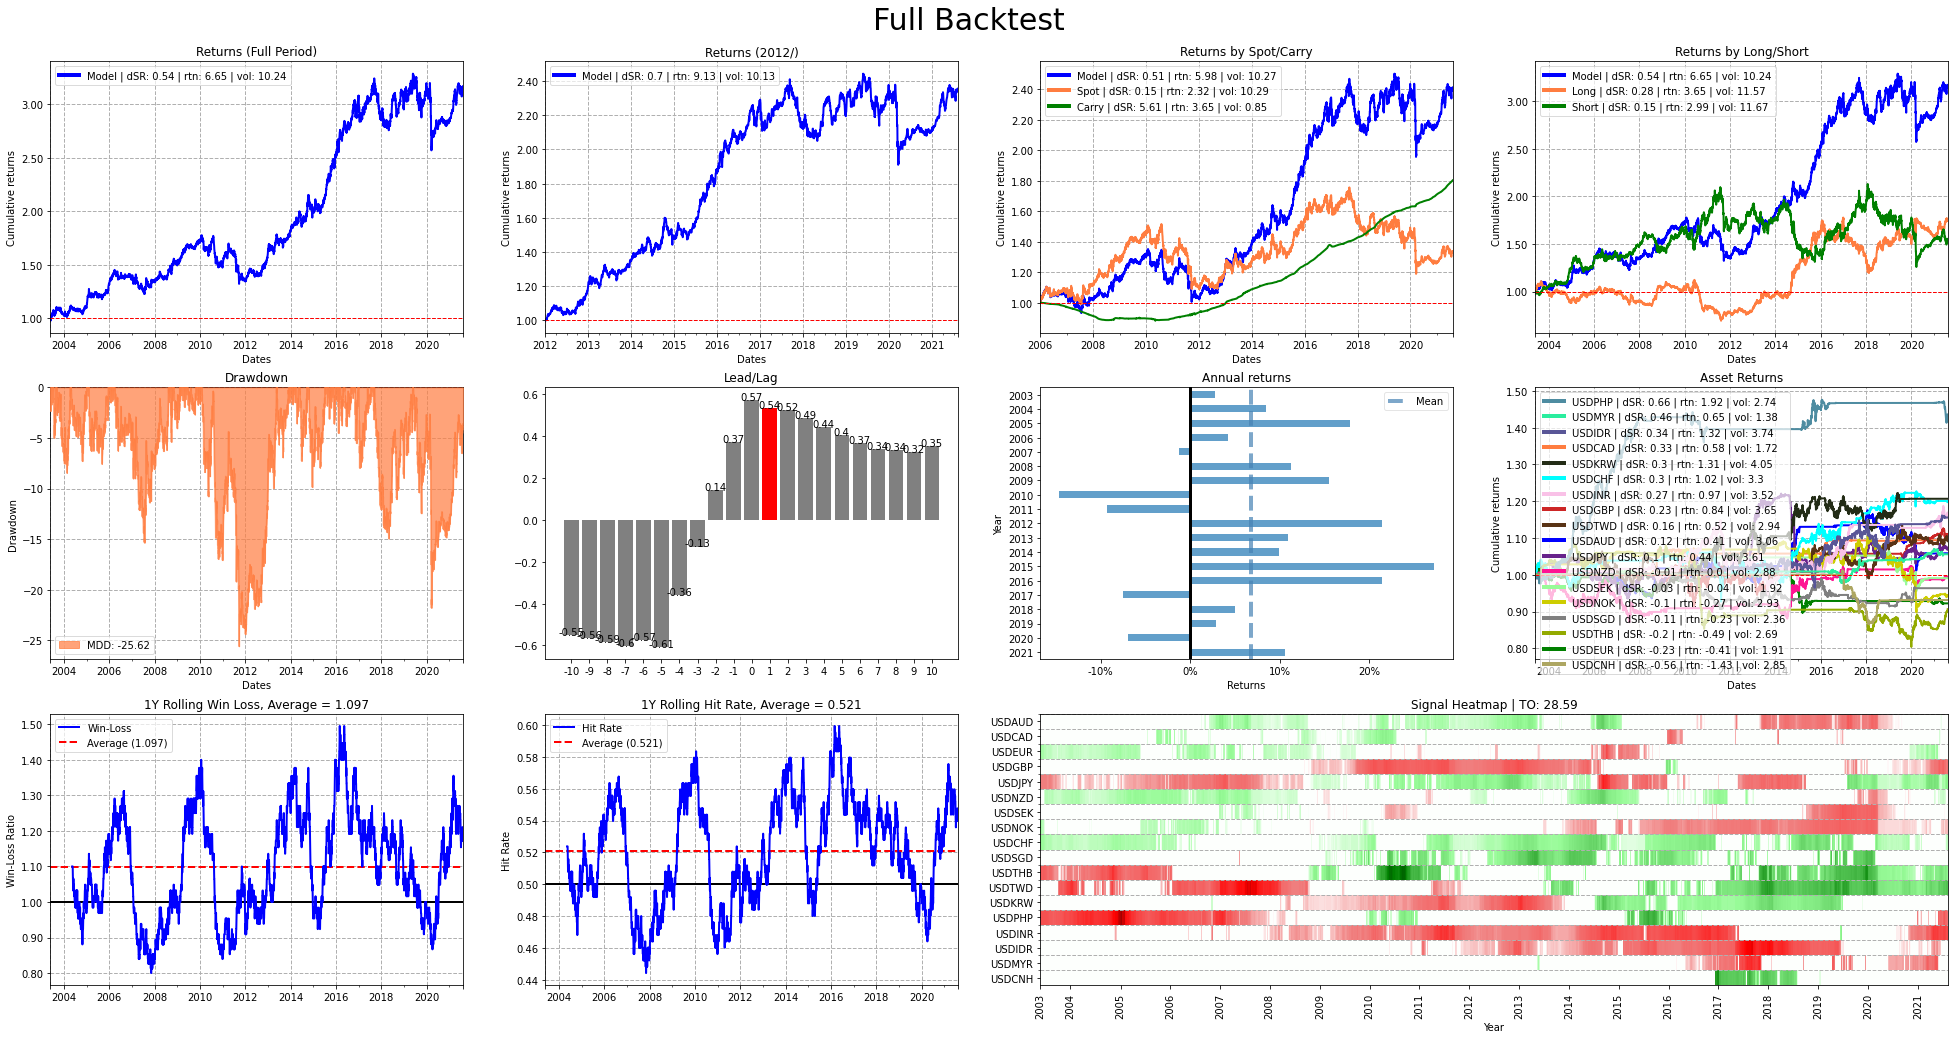

In [9]:
plot_bt(daily_bt)

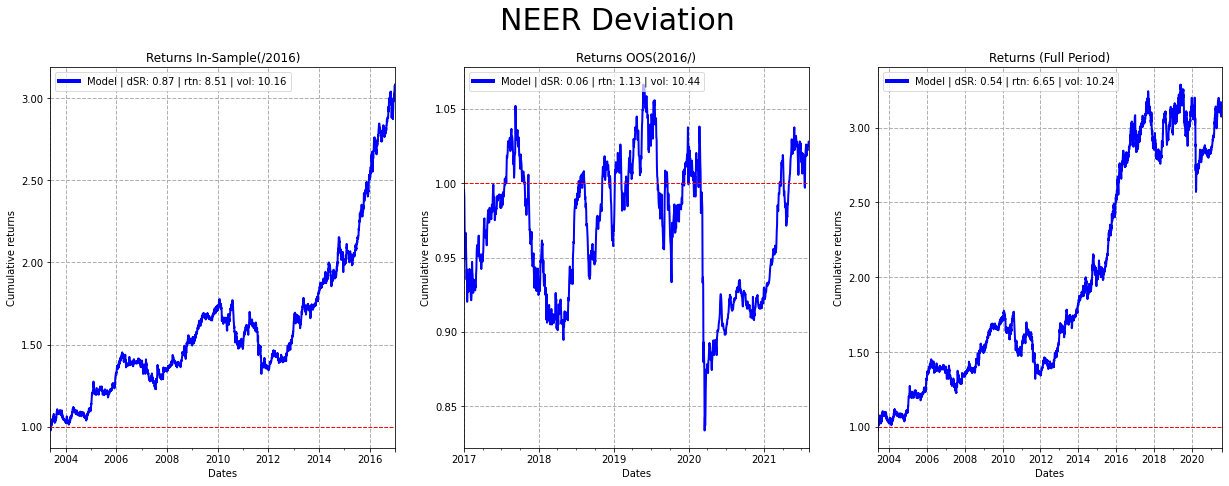

In [10]:
gs = GridSpec(nrows = 1, ncols = 3)
fig = plt.figure(figsize=(21, 7))
fig.suptitle(t="NEER Deviation", fontsize=30, y=1)

fig.add_subplot(gs[0]).set_label(gen_plot_rtn(daily_bt.model_rtn[:"2016"], main = "Returns In-Sample(/2016)", compound=True))
fig.add_subplot(gs[1]).set_label(gen_plot_rtn(daily_bt.model_rtn["2017":], main = "Returns OOS(2016/)", compound=True))
fig.add_subplot(gs[2]).set_label(gen_plot_rtn(daily_bt.model_rtn, main = "Returns (Full Period)", compound=True))